In [2]:
from dynRNN.cells import *

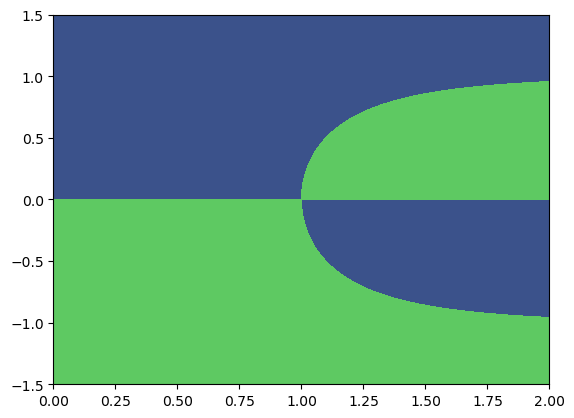

In [3]:
# GRU/BRC

x = torch.linspace(0, 2, 1000)
y = torch.linspace(-1.5, 1.5, 1000)

xy_grid = torch.meshgrid(x, y, indexing="ij")

x_g = xy_grid[0].T
y_g = xy_grid[1].T.flip(0, 1)

GRU = GRUCell()
C = 0.9
pars = C

ax = GRU.phaseplane(x_g, y_g, pars, input=0, bifurcation=True)
plt.show()

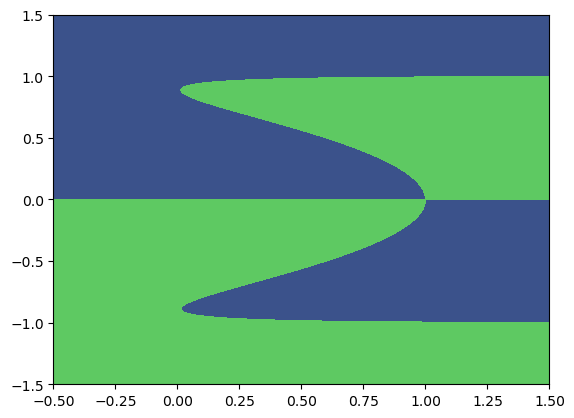

In [4]:
# TRC

x = torch.linspace(-0.5, 1.5, 1000)
y = torch.linspace(-1.5, 1.5, 1000)

xy_grid = torch.meshgrid(x, y, indexing="ij")

x_g = xy_grid[0].T
y_g = xy_grid[1].T.flip(0, 1)

TRC = TRCell()
C = 0.9
B = 2
pars = B, C

ax = TRC.phaseplane(x_g, y_g, pars, input=0, bifurcation=True)
plt.show()

4


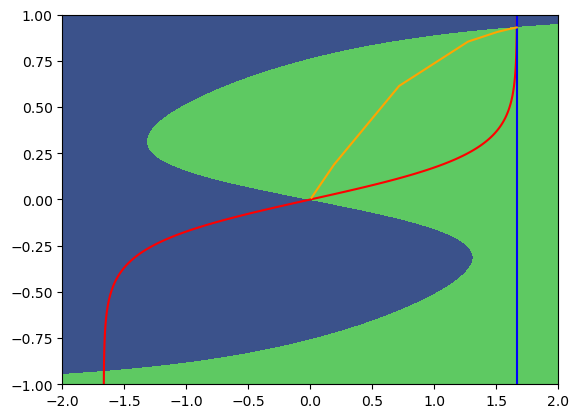

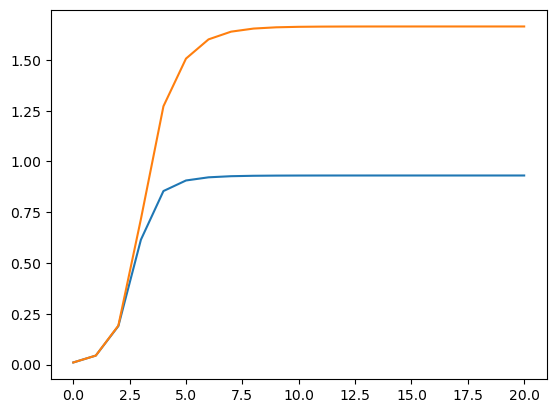

In [110]:
# LSTM

x = torch.linspace(-2, 2, 1000)
y = torch.linspace(-1, 1, 1000)

xy_grid = torch.meshgrid(x, y, indexing="ij")

x_g = xy_grid[0].T
y_g = xy_grid[1].T.flip(0, 1)

LSTM = LSTMCell()
A = .4 # [0, 1]
B = 1 # [0, 1]
D = 1#0.7 # [0, 1]
C = 4#(1-A)/(B*D) + 1 # bifurcation at (1-A)/(B*D)
print(C)
pars = A, B, C, D

ax = LSTM.phaseplane(x_g, y_g, pars, input=0)

testx = torch.linspace(-1, 1, 100)
ax.plot(1/(1-A)*torch.ones_like(testx), testx, 'blue')

xt = .0*torch.randn(20)
h0 = torch.tensor(0.01)
s0 = torch.tensor(0.01)

ht, st = LSTM.trajectory(h0, s0, pars, xt)
ax.plot(st, ht, 'orange')
plt.show()

# plt.plot(xt)
plt.plot(ht)
plt.plot(st)
plt.show()

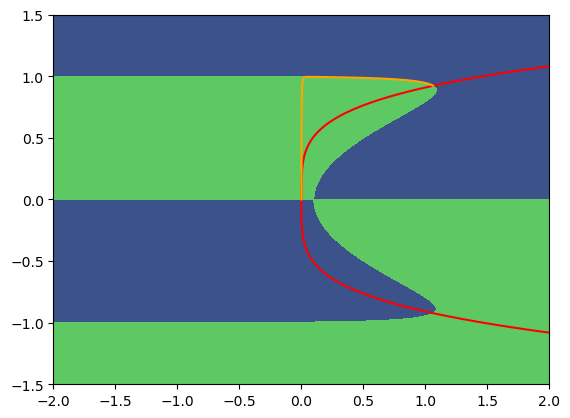

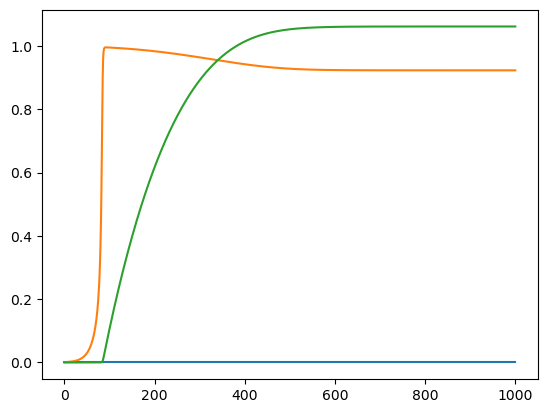

In [6]:
# Flex

x = torch.linspace(-2, 2, 1000)
y = torch.linspace(-1.5, 1.5, 1000)

xy_grid = torch.meshgrid(x, y, indexing="ij")

x_g = xy_grid[0].T
y_g = xy_grid[1].T.flip(0, 1)

FRC = FlexCell()
A = 1.1
B = 2
C = 0.7
D = 0.005
E = 1.1

pars = A, B, C, D, E

ax = FRC.phaseplane(x_g, y_g, pars, input=0)

xt = .0*torch.randn(1000)
h0 = torch.tensor(0.001)
s0 = torch.tensor(0)

ht, st = FRC.trajectory(h0, s0, pars, xt)
ax.plot(st, ht, 'orange')
plt.show()

plt.plot(xt)
plt.plot(ht)
plt.plot(st)
plt.show()